In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [3]:
df = pd.read_csv("laptop_data.csv")

In [4]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [5]:
##### check how much null values are available in each columns
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
##### check how much duplicated rows are available
df.duplicated().sum()

0

In [7]:
# Delete the Unnamed: 0 column
df.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [9]:
# remove GB and kg from Ram and Weight column

df["Ram"] = df["Ram"].str.replace("GB",'')
df["Weight"] = df["Weight"].str.replace("kg",'')

In [10]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [11]:
# change the data type of Ram and Weight columns
df["Ram"] = df["Ram"].astype("int32")
df["Weight"] = df["Weight"].astype("float32")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [13]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


#### EDA

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Nasir\AppData\Local\Temp\ipykernel_3892\4107504778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


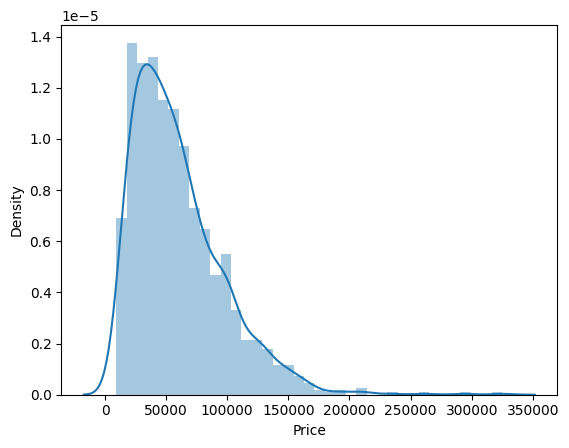

In [15]:
# analyse the prize

sns.distplot(df["Price"])
plt.show()

<Axes: xlabel='Company'>

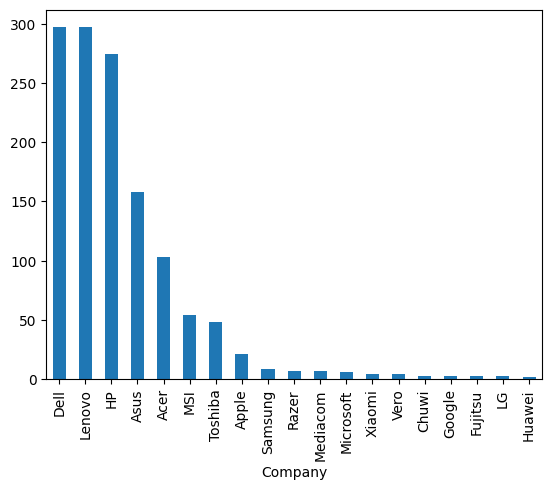

In [16]:
# see each company has how much laptop
df["Company"].value_counts().plot(kind="bar")

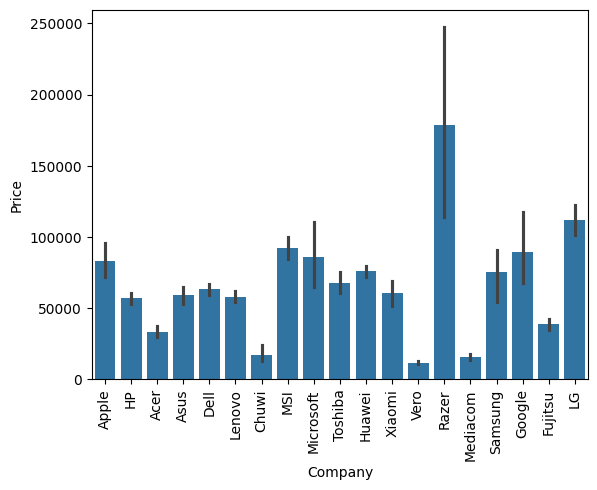

In [17]:
# average price of each company

sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [18]:
# show much types of laptop are present

df["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

<Axes: xlabel='TypeName'>

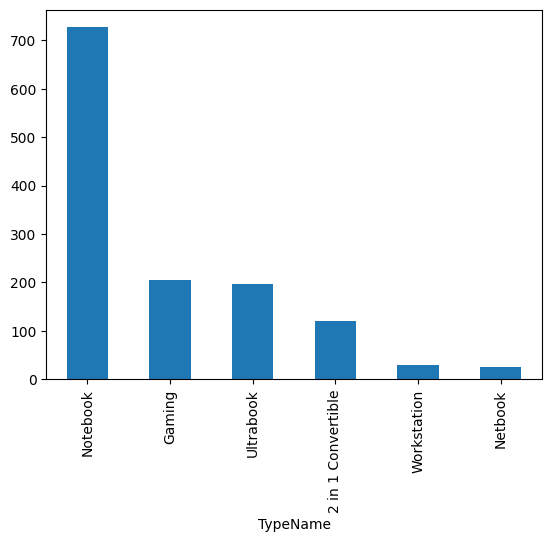

In [19]:
df["TypeName"].value_counts().plot(kind="bar")

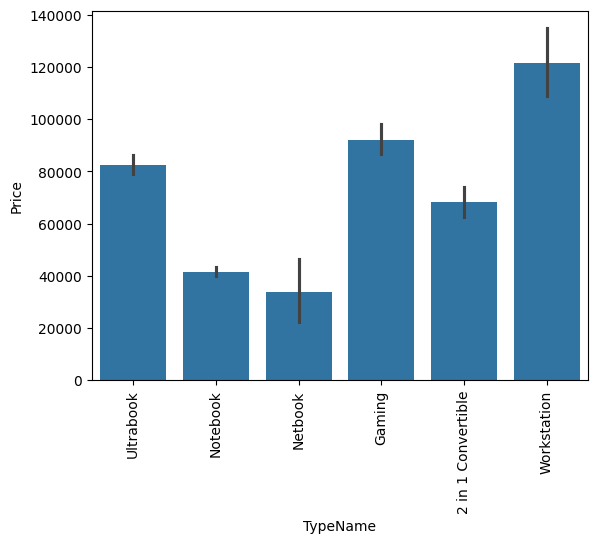

In [20]:
# show everage price of each types 
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

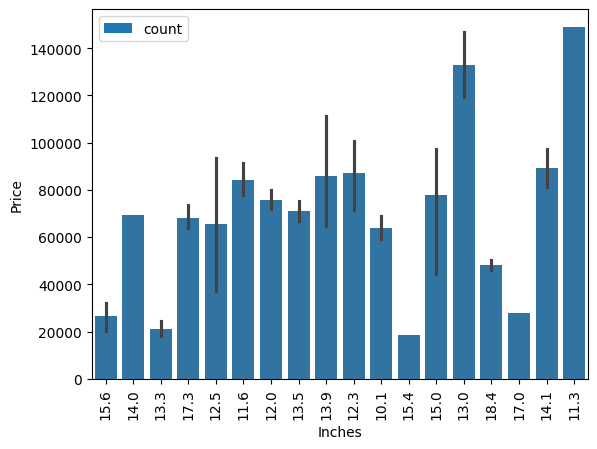

In [21]:
# show the relationship between price and Inches
df["Inches"].value_counts().plot(kind="bar")
sns.barplot(x=df["Inches"],y=df["Price"])

In [22]:
# show the relationship between price and Inches
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

<Axes: xlabel='ScreenResolution'>

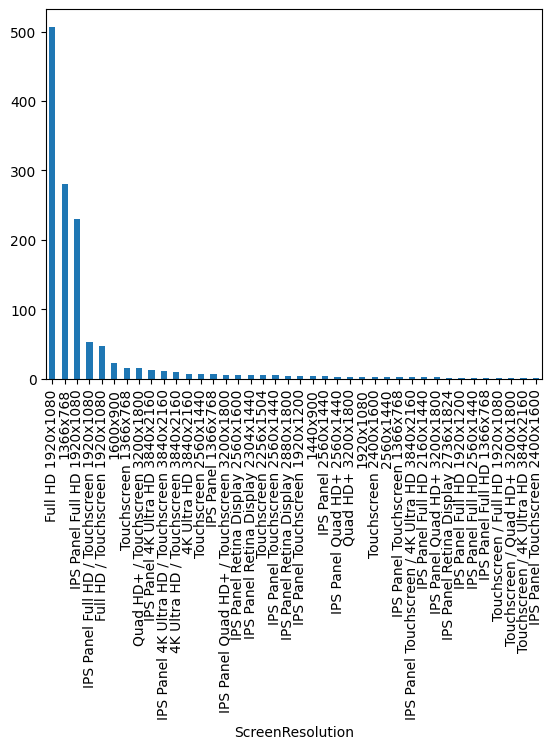

In [23]:
df["ScreenResolution"].value_counts().plot(kind="bar")

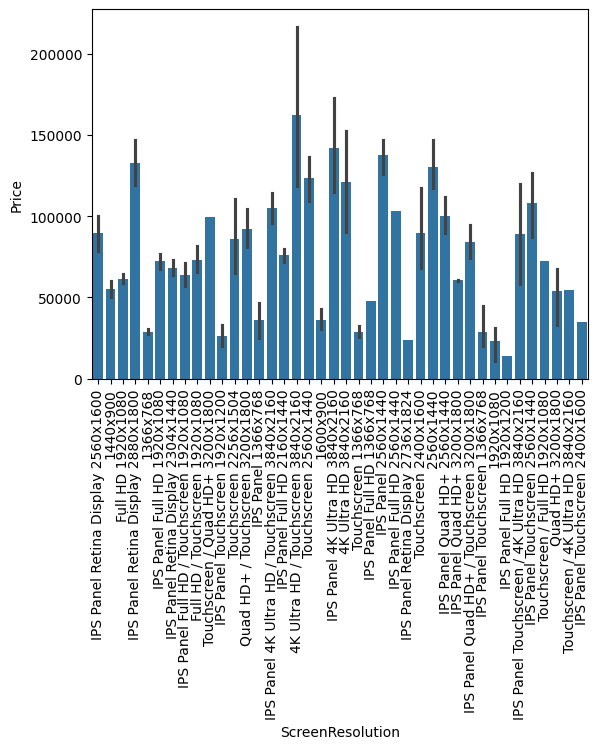

In [24]:
sns.barplot(x=df["ScreenResolution"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [25]:
# Feature Engineer

## create new usefull collumns from ScreenResolution column


In [26]:
# create touchscreen column
df["Touchscreen"]= df["ScreenResolution"].apply(lambda x:1 if("Touchscreen" in x) else 0)

In [27]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1254,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,23655.7872,0
1100,Dell,Ultrabook,12.5,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.50,60480.7920,0
578,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,145401.1200,0
966,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,43956.0000,0
737,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.55,35111.5200,1
102,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 520,Linux,2.20,34472.1600,0
418,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.14,28768.5360,0
1152,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,AMD Radeon R5 M330,No OS,2.32,31914.7200,0
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0
1251,HP,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86,21258.7200,0


In [28]:
#find the relationship btween touchscreen and prise

df["Touchscreen"].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen'>

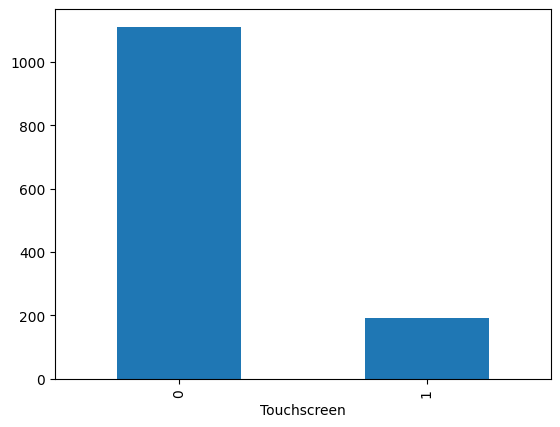

In [29]:
df["Touchscreen"].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

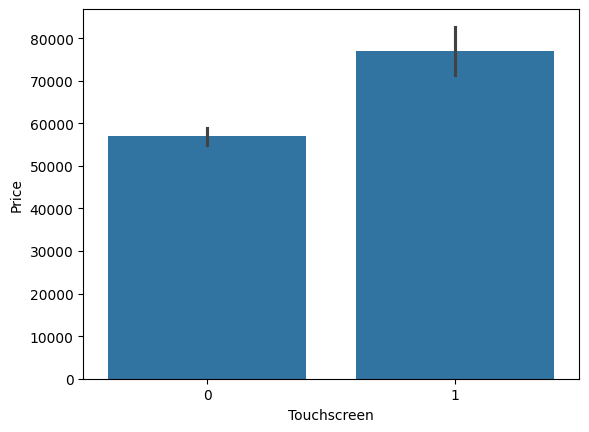

In [30]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [31]:
# create the new column IPS
df["IPS"]= df["ScreenResolution"].apply(lambda x:1 if("IPS" in x) else 0)

In [32]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
442,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,76137.12,0,1
1255,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,18061.92,0,0
129,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.50,49443.84,0,0
1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.00,68464.80,1,0
589,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,94305.60,0,1


In [33]:
#find the relationship btween IPS and prise

df["IPS"].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS'>

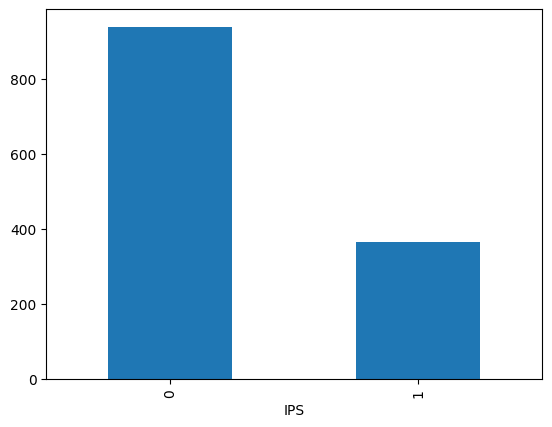

In [34]:
df["IPS"].value_counts().plot(kind="bar")

<Axes: xlabel='IPS', ylabel='Price'>

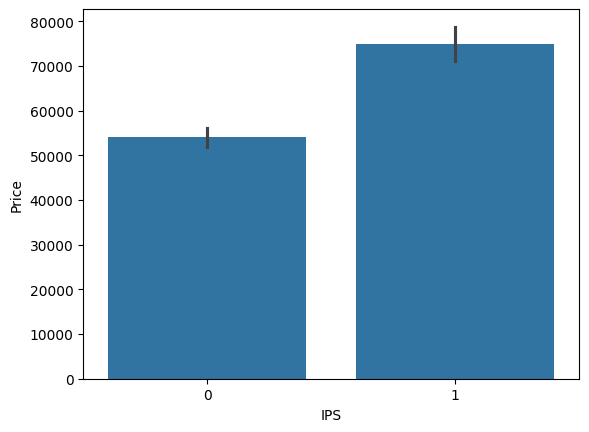

In [35]:
sns.barplot(x=df["IPS"], y=df["Price"])

In [36]:
### create x_reso, y_reso

df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1


In [37]:
df["ScreenResolution"].str.split("x")

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [38]:
df["ScreenResolution"].str.split("x", n=1, expand=True) # convert into dataframe

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [39]:
df["y_reso"]=df["ScreenResolution"].str.split("x",expand=True)[1]

In [40]:
df["x_reso"]=df["ScreenResolution"].str.split("x",expand=True)[0]

In [41]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,y_reso,x_reso
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,IPS Panel Retina Display 2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440


In [42]:
df["x_reso"].str.replace(",","").str.findall(r'\d+\.?\d+') # regex

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: x_reso, Length: 1303, dtype: object

In [43]:
df["x_reso"] = df["x_reso"].str.replace(",","").str.findall(r'\d+\.?\d+').apply(lambda x:x[0])

In [44]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,y_reso,x_reso
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  y_reso            1303 non-null   object 
 14  x_reso            1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [46]:
df["x_reso"] = df["x_reso"].astype("int32")
df["y_reso"] = df["y_reso"].astype("int32")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  y_reso            1303 non-null   int32  
 14  x_reso            1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [48]:
# find the corellation with Price 

df["ppi"] = (((df["x_reso"]**2) + (df["y_reso"]**2))**0.5/df["Inches"]).astype("float32")


In [49]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,y_reso,x_reso,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,226.983002
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,127.677940


In [50]:
# drop the columns
df.drop(columns=["ScreenResolution"],inplace=True)
df.drop(columns=["x_reso"],inplace=True)
df.drop(columns=["y_reso"],inplace=True)
df.drop(columns=["Inches"],inplace=True)

In [51]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002


In [52]:


# working on the cpu column

# feature engineering


In [53]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [54]:
df["Cpu"].apply(lambda x:(x.split()[0:3]))

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [55]:
df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))  # convert array into str

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu, Length: 1303, dtype: object

In [56]:
df["Cpu Name"] = df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [57]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5


In [58]:
df["Cpu Name"].value_counts()

Cpu Name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [59]:
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "IMD Processor"
        
        
df["Cpu brand"] = df["Cpu Name"].apply(fetch_processor)

In [60]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
634,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,8,1TB HDD,Intel HD Graphics 500,Windows 10,2.0,21258.7200,0,0,100.454666,Intel Celeron Dual,Other Intel Processor
513,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.2,64961.1072,0,0,141.212006,Intel Core i7,Intel Core i7
39,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.1,46833.1200,0,0,141.212006,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

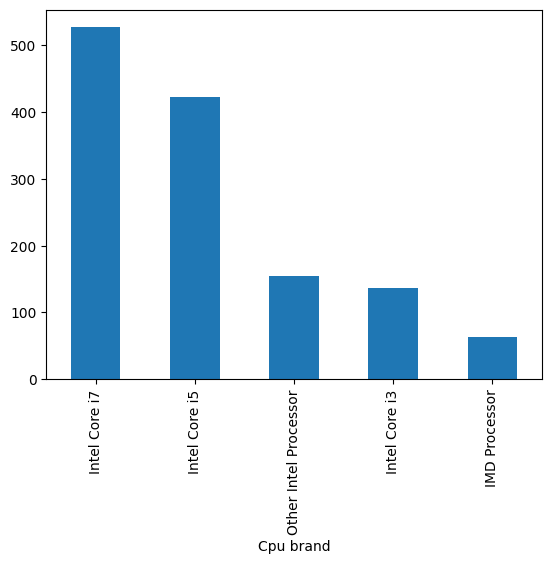

In [61]:
df["Cpu brand"].value_counts().plot(kind="bar")

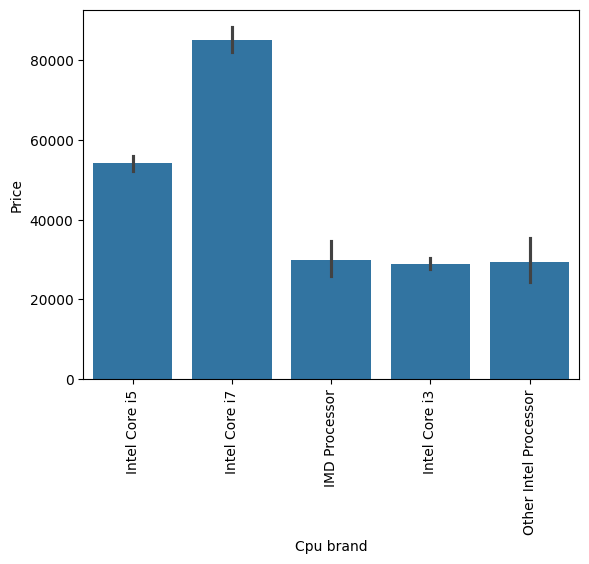

In [62]:
sns.barplot(x=df["Cpu brand"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [63]:
# dro the column
df.drop(columns=["Cpu", "Cpu Name"],inplace=True)

In [64]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5


<Axes: xlabel='Ram'>

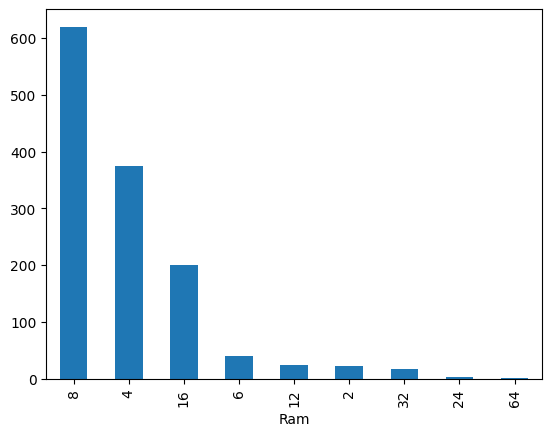

In [65]:
# working on ram column

df["Ram"].value_counts().plot(kind="bar")

<Axes: xlabel='Ram', ylabel='Price'>

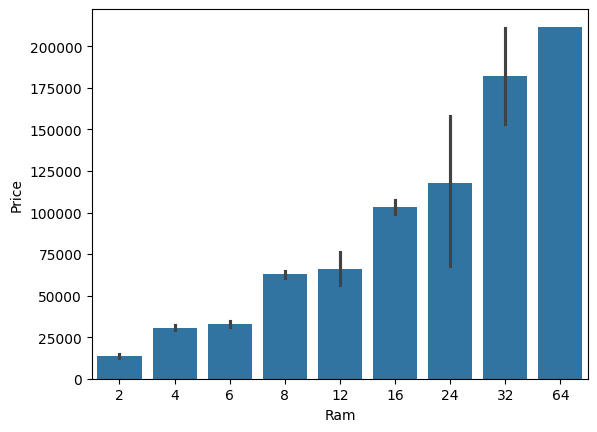

In [66]:
sns.barplot(x=df["Ram"],y=df["Price"])

In [67]:
df["Memory"] = df["Memory"].astype(str).replace("\.0",'',regex=True)
df["Memory"] = df["Memory"].str.replace("GB","")
df["Memory"] = df["Memory"].str.replace("TB","000")

new_df = df["Memory"].str.split("+", n=1, expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Nasir\AppData\Local\Temp\ipykernel_3892\527124111.py:1: SyntaxWarning: invalid escape sequence '\.'
  df["Memory"] = df["Memory"].astype(str).replace("\.0",'',regex=True)


In [68]:
df["Memory"].value_counts()

Memory
256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   

In [69]:
new_df

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [70]:
df["first"] = new_df[0]
df["first"] = df["first"].str.strip()

df["second"] = new_df[1]

In [71]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,128 SSD,None


In [72]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


df["second"].fillna(0, inplace=True)
# df["second"].fillna(0, inplace=True)

df["second"] = df["second"].astype(str)


C:\Users\Nasir\AppData\Local\Temp\ipykernel_3892\3746958128.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna(0, inplace=True)


In [73]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,128 SSD,0,0,1,0,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   IPS                  1303 non-null   int64  
 10  ppi                  1303 non-null   float32
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   object 
 13  second               1303 non-null   object 
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [75]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["second"]= df["second"].str.replace(r'\D', '')





In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   IPS                  1303 non-null   int64  
 10  ppi                  1303 non-null   float32
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   object 
 13  second               1303 non-null   object 
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [77]:
df["second"].value_counts()

second
0                1095
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: count, dtype: int64

In [78]:
df["second"].unique()

array(['0', '  1000 HDD', '  256 SSD', '  2000 HDD', '  500 HDD',
       '  512 SSD', '  1000 Hybrid'], dtype=object)

In [79]:
df["first"]= df["first"].str.replace('SSD', '')
df["first"]= df["first"].str.replace('Flash Storage', '')
df["first"]= df["first"].str.replace('HDD', '')
df["first"]= df["first"].str.replace('Hybrid', '')
df["first"]= df["first"].str.strip()

df["second"]= df["second"].str.replace('SSD', '')
df["second"]= df["second"].str.replace('Flash Storage', '')
df["second"]= df["second"].str.replace('HDD', '')
df["second"]= df["second"].str.replace('Hybrid', '')
df["second"]= df["second"].str.strip()

df["first"]= df["first"].astype(int)
df["second"]= df["second"].astype(int)

df["HDD"]= (df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]= (df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]= (df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]= (df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer2HDD', 'Layer1SSD', 'Layer2SSD', 
                 'Layer1Hybrid', "Layer2Hybrid",'Layer1Flash_Storage','Layer2Flash_Storage'  ],inplace=True)

In [80]:
df.sample(8)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1222,HP,Notebook,6,1000 HDD,AMD Radeon 530,Windows 10,2.10,28185.120,0,0,141.212006,IMD Processor,1000,0,0,0
1025,HP,Ultrabook,4,256 SSD,Intel HD Graphics 620,Windows 10,1.26,83063.520,0,0,125.367432,Intel Core i5,0,256,0,0
240,Lenovo,Notebook,8,128 SSD,Intel HD Graphics 520,Windows 10,2.20,31381.920,0,0,100.454666,Intel Core i3,0,128,0,0
671,Lenovo,Notebook,8,128 SSD + 1000 HDD,AMD Radeon R5 M430,Windows 10,1.90,43580.376,0,0,141.212006,Intel Core i5,1000,128,0,0
244,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.38,57489.120,1,1,158.482529,Intel Core i7,0,256,0,0
1209,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.20,130482.720,0,0,141.212006,Intel Core i7,1000,256,0,0
1022,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.11,61218.720,0,1,165.632111,Intel Core i5,0,256,0,0
372,Asus,Gaming,16,256 SSD + 1000 HDD,AMD Radeon RX 580,Windows 10,3.25,117162.720,0,1,127.335678,IMD Processor,1000,256,0,0


In [81]:
df.drop(columns="Memory",inplace=True)

In [82]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5,0,256,0,0


In [83]:
df.corr(numeric_only=True)["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [84]:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [85]:
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128


In [86]:

# working on GPU column

In [87]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [88]:
df["Gpu brand"] = df["Gpu"].apply(lambda x:x.split(" ")[0])

In [89]:
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel


In [90]:
df.drop(columns="Gpu", inplace=True)

In [91]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel


In [92]:
df["Gpu brand"].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [93]:
df = df[df["Gpu brand"] !="ARM"]

In [94]:
df["Gpu brand"].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='Gpu brand', ylabel='Price'>

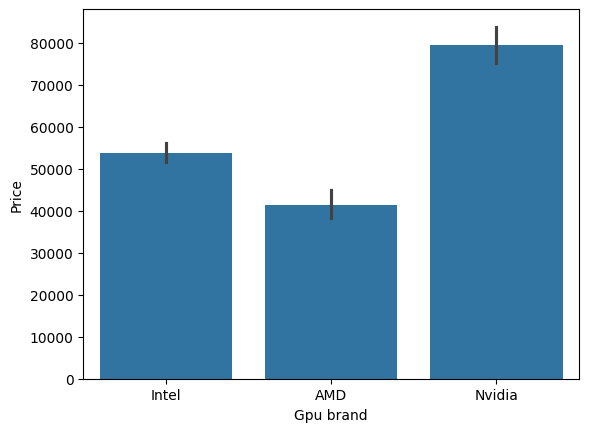

In [95]:
sns.barplot(x=df["Gpu brand"],y=df["Price"])

In [96]:
# working on OpSys

In [97]:
df["OpSys"].value_counts() # it has to many ctagory

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

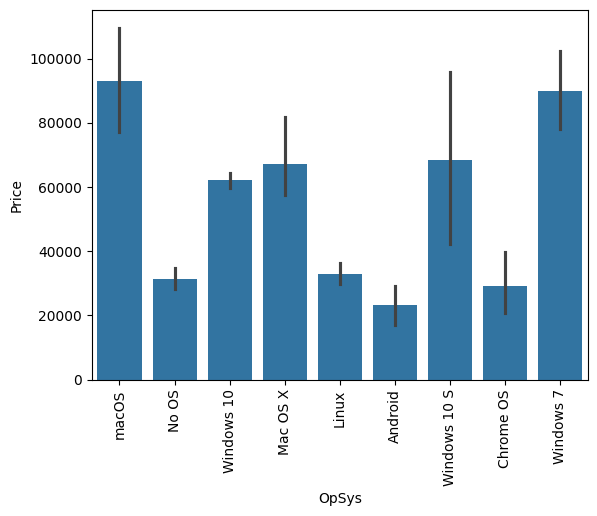

In [98]:
sns.barplot(x=df["OpSys"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [99]:
def cat_os(text):
    if text=="Windows 10" or text=="Windows 7" or text=="Windows 10 S":
        return "Windows"
    elif text == "Mac OS X" or text == "macOS":
        return "Mac"
    else:
        return "Other/No Os/Linex"
        


In [100]:
df["os"] = df["OpSys"].apply(cat_os )

In [101]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,Mac


In [102]:
df["os"].value_counts()

os
Windows              1125
Other/No Os/Linex     156
Mac                    21
Name: count, dtype: int64

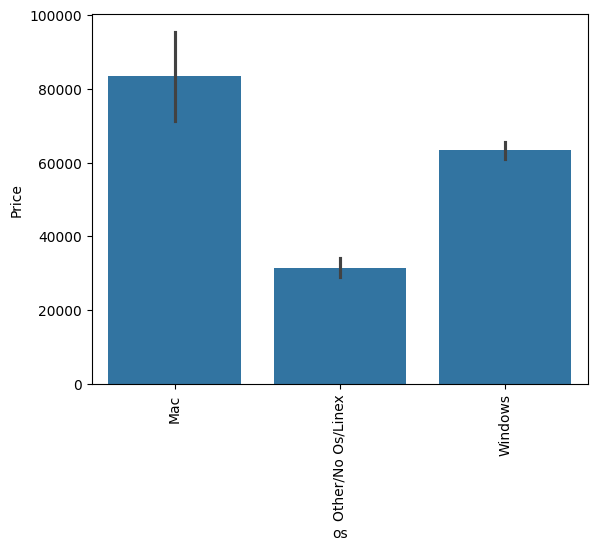

In [103]:
sns.barplot(x=df["os"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [104]:
df.drop(columns="OpSys",inplace=True)

In [105]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,Mac


In [106]:
# working on Weight


In [107]:
df["Weight"].value_counts()

Weight
2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
2.26      1
2.34      1
Name: count, Length: 171, dtype: int64

C:\Users\Nasir\AppData\Local\Temp\ipykernel_3892\196129849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


<Axes: xlabel='Weight', ylabel='Density'>

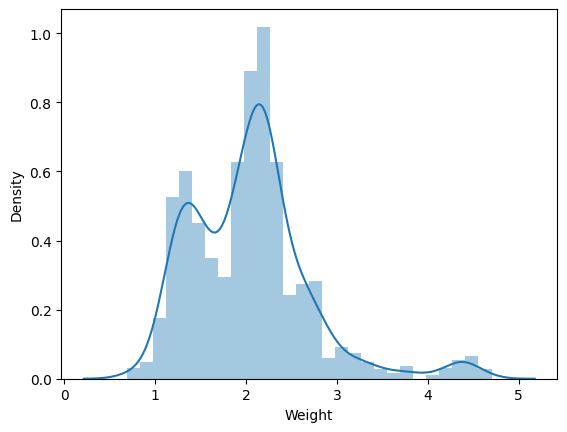

In [108]:
sns.distplot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

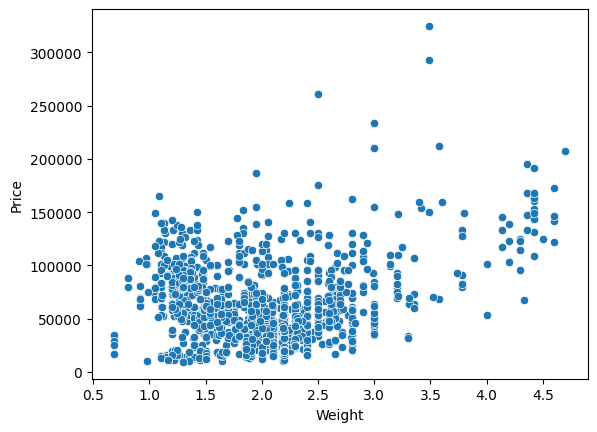

In [109]:
sns.scatterplot(x=df["Weight"], y=df["Price"])

In [110]:
df.corr(numeric_only=True)["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

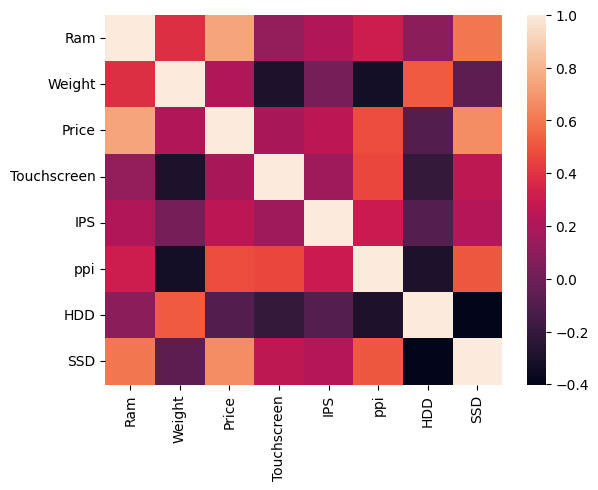

In [111]:
sns.heatmap(df.corr(numeric_only=True))

### model building

In [112]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.212006,Intel Core i5,0,256,Intel,Other/No Os/Linex
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534622,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983002,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350510,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053528,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454666,Intel Core i7,1000,0,AMD,Windows


C:\Users\Nasir\AppData\Local\Temp\ipykernel_3892\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

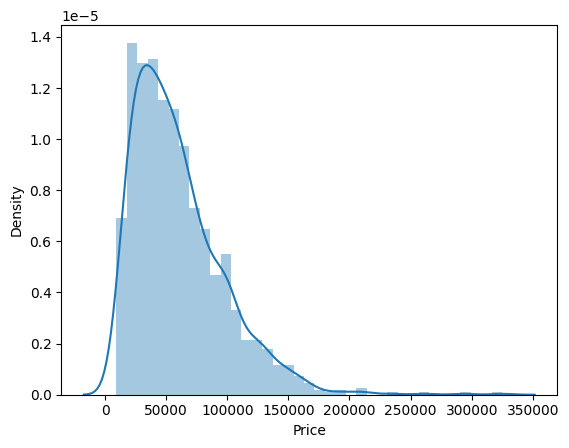

In [113]:
sns.distplot(df["Price"])

C:\Users\Nasir\AppData\Local\Temp\ipykernel_3892\4139655757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Price"]))


<Axes: xlabel='Price', ylabel='Density'>

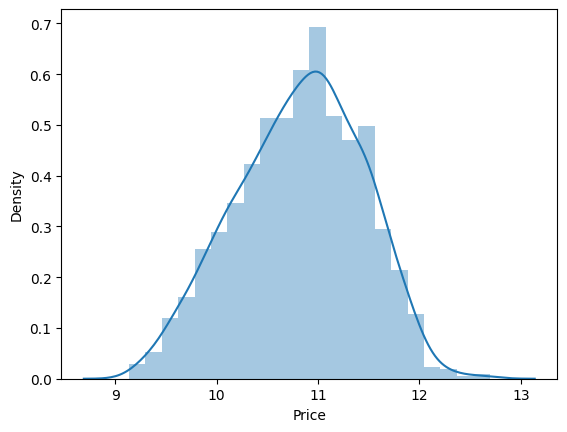

In [114]:
sns.distplot(np.log(df["Price"]))

In [115]:
# dependent and independent variables

x = df[["Company","TypeName", "Ram", "Weight", "Touchscreen", "IPS", "ppi", "Cpu brand", "HDD", "SSD", "Gpu brand", "os"]]
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.212006,Intel Core i5,0,256,Intel,Other/No Os/Linex
3,Apple,Ultrabook,16,1.83,0,1,220.534622,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350510,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053528,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454666,Intel Core i7,1000,0,AMD,Windows


In [116]:
y = np.log(df["Price"])
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [133]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [121]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454666,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.212006,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094208,Other Intel Processor,0,0,Intel,Other/No Os/Linex
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.212006,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.212006,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454666,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.212006,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454666,IMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454666,Intel Core i3,2000,0,Nvidia,Other/No Os/Linex


In [122]:
x_test

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
248,HP,Notebook,4,1.49,0,1,165.632111,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454666,Other Intel Processor,500,0,Intel,Other/No Os/Linex
1251,HP,Notebook,4,1.86,0,0,100.454666,IMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.212006,Intel Core i5,1000,0,Intel,Other/No Os/Linex
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632111,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,127.335678,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454666,IMD Processor,500,0,AMD,Other/No Os/Linex
322,Asus,Notebook,8,2.00,0,0,157.350510,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632111,Intel Core i7,0,256,Intel,Windows


In [123]:
y_train

183     10.651384
1141    11.016798
1049     9.638174
1020    10.655148
878     10.791749
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1193    11.034319
Name: Price, Length: 1106, dtype: float64

In [124]:
y_test

248     10.490274
555      9.387207
1251     9.964522
547     10.111883
885     11.470547
          ...    
1129    11.004649
172      9.708902
322     10.973157
996     11.182680
470     11.575963
Name: Price, Length: 196, dtype: float64

In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [163]:
# algorithems

from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [161]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.0/124.9 MB 245.8 kB/s eta 0:08:29
   ---------------------------------------- 0.1/124.9 MB 438.1 kB/s eta 0:04:45
   ---------------------------------------- 0.1/124.9 MB 385.0 kB/s eta 0:05:25
   ---------------------------------------- 0.1/124.9 MB 426.7 kB/s eta 0:04:53
   ---------------------------------------- 0.2/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.2/124.9 MB 486.6 kB/s eta 0:04:17
   ---------------------------------------- 0.3/124.9 MB 520.7 kB/s eta 0:04:00
   ---------------------------------------- 0.3/124.9 MB 531.5 kB/s eta 0:03:55
   ---------------------------------------- 0.5/124.9 MB 702.9 kB/s eta 0:02:58
   ---------------------------------------- 0.5/124.9 MB 7


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Linear Regression

In [170]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= LinearRegression()

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))


R2 score  0.8073277435584012
MAE  0.21017828080372475


### Ridge Regression

In [171]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= Ridge(alpha=10)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8127331017700293
MAE  0.2092680232409918


### Lasso Regression

In [172]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= Lasso(alpha=0.001)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8071853931274351
MAE  0.21114361715169858


### KNN

In [173]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= KNeighborsRegressor(n_neighbors=3)
# step2= KNeighborsRegressor(n_neighbors=5)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8009101720524295
MAE  0.19413408395581944


### Decision Tree

In [174]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= DecisionTreeRegressor(max_depth=8)
# step2= DecisionTreeRegressor(max_depth=10)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8338403843243297
MAE  0.1850111974808263


### SVM

In [175]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= SVR(kernel='rbf', C=10000, epsilon=0.1)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8090031875907016
MAE  0.2021434919872643


### Random Forest

In [186]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns  ---> random forest is best here
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

# create the pipeline
pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe_rf .fit(x_train,y_train)

# predict the model
y_predict = pipe_rf.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8873402378382488
MAE  0.15860130110457718


### ExtraTrees

In [177]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first',),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= ExtraTreesRegressor(n_estimators=100,
                             bootstrap=True,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8850720167552375
MAE  0.16154538000217084


### AdaBoost

In [178]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.7868562688534031
MAE  0.23449436086168898


### Gradient Boost

In [179]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= GradientBoostingRegressor(n_estimators=500)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8820683869694246
MAE  0.15946973674612974


### XgBoost

In [180]:
# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# create the model
step2= XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8771404806375557
MAE  0.16262936288951352


### Voting Regressor

In [181]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=500)
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
et = ExtraTreesRegressor(bootstrap=True,n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

step2 = VotingRegressor([('rf',rf,), ('gbdt',gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8948003197420473
MAE  0.15311801908538217


### Stacking

In [182]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

# apply the OneHtEncoder() on [0,1,7.10,11] columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

estimators= [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb',XGBRegressor(n_estimators=25,max_depth=5,learning_rate=0.3))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

# create the pipeline
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# train the model
pipe.fit(x_train,y_train)

# predict the model
y_predict = pipe.predict(x_test)

print('R2 score ', r2_score(y_test,y_predict))
print('MAE ', mean_absolute_error(y_test,y_predict))

R2 score  0.8799546339160339
MAE  0.16517436805808905


### Exporting the Model

In [ ]:
import pickle

pickle.dump(df,open("df.pkl","wb"))
pickle.dump(pipe,open("pipe.pkl","wb"))


In [187]:
pickle.dump(pipe_rf,open("pipe_rf.pkl","wb"))

In [185]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,Mac
